# Mental Health Detection via Online Textual Conversations

# Problem Statement:
Mental health issues like depression, anxiety, and suicidal tendencies often go unnoticed in daily conversations, especially in online forums, social media posts, or text-based support systems. Existing tools are either too general or overly reliant on structured input, missing subtle signs of mental distress embedded in unstructured conversations. This project aims to identify potential mental health concerns based on users’ language and conversational patterns in online texts.
# Objective:
Build an NLP model that detects signs of mental health issues (like depression, anxiety, or suicidal ideation) from text conversations in online forums or social media. The model should analyze emotion, tone shifts, and contextual triggers across the conversation to detect mental health signals and provide early warnings.


# Data Loading

In [4]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB



In [5]:
# Load the data
data = pd.read_csv('broad_reddit_search4.csv')
data.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_16768\1398302225.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('broad_reddit_search4.csv')


,title,post_body,comment_body,comment_score,post_url,created,subreddit,post_score,post_num_comments,author,...,author_premium,distinguished,all_awardings,num_crossposts,total_awards_received,post_thumbnail,link_flair_text,post_id,comment_id,author_flair_text
0,Need some advice in life,I'm a 21-year-old male final year engineering ...,You can talk to me. I am a final year engineer...,1,https://www.reddit.com/r/mentalhealth/comments...,1.730402e+09,mentalhealth,1,1,LandscapeStriking288,...,False,NaN,[],0,0,self,Need Support,1gglxsi,luqr7bk,NaN
1,CW// Abuse** Is it normal for a psychologist t...,\nI’m seeking an ADHD diagnosis and had my int...,I do not see what the FUCK detailed accounts o...,2,https://www.reddit.com/r/mentalhealth/comments...,1.730401e+09,mentalhealth,1,1,CarSoggy7883,...,False,NaN,[],0,0,self,Opinion / Thoughts,1gglv5z,luqn8ow,NaN
2,How can I overcome my anger/fear towards women?,"As the title states, this is an issue I have b...","There's never an easy answer to ""how do I get ...",1,https://www.reddit.com/r/mentalhealth/comments...,1.730403e+09,mentalhealth,3,1,SoulSpiegel12,...,False,NaN,[],0,0,self,Need Support,1ggktk3,luqvdmq,NaN
3,I'm not ok,I got diagnosed with a bunch of mental health ...,It’s concerning that your wife is not more emo...,1,https://www.reddit.com/r/mentalhealth/comments...,1.730396e+09,mentalhealth,3,2,loopedmatch,...,False,NaN,[],0,0,self,Need Support,1gghfn5,luq6l9l,NaN
4,Mental Health is weird,I literally had a full blown crying breakdown ...,"Literally, I left work a few weeks back on a S...",1,https://www.reddit.com/r/mentalhealth/comments...,1.730391e+09,mentalhealth,2,1,Substantial-Iron-453,...,False,NaN,[],0,0,self,Opinion / Thoughts,1gggldf,lups45m,NaN


In [13]:
import pandas as pd

# Load data into df
df = pd.read_csv('broad_reddit_search4.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_16768\1476975777.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('broad_reddit_search4.csv')


In [14]:
df.tail()

,title,post_body,comment_body,comment_score,post_url,created,subreddit,post_score,post_num_comments,author,...,author_premium,distinguished,all_awardings,num_crossposts,total_awards_received,post_thumbnail,link_flair_text,post_id,comment_id,author_flair_text
46929,My 18yo sister is seeing a married guy(27) who...,"Hey y’all, as an older sister(25) I wanted to ...","well you have to ask, why is your sister with ...",-1,https://www.reddit.com/r/relationships/comment...,1.726353e+09,relationships,106,29,Azalealea,...,False,NaN,[],0,0,self,NaN,1fgwdlj,ln5ot1c,NaN
46930,My 18yo sister is seeing a married guy(27) who...,"Hey y’all, as an older sister(25) I wanted to ...",I would also do it anon bc otherwise your sist...,1,https://www.reddit.com/r/relationships/comment...,1.726455e+09,relationships,106,29,Azalealea,...,False,NaN,[],0,0,self,NaN,1fgwdlj,lncrj9b,NaN
46931,My 18yo sister is seeing a married guy(27) who...,"Hey y’all, as an older sister(25) I wanted to ...",>And you can remind her of her innate worth an...,9,https://www.reddit.com/r/relationships/comment...,1.726360e+09,relationships,106,29,Azalealea,...,False,NaN,[],0,0,self,NaN,1fgwdlj,ln69hkn,NaN
46932,My 18yo sister is seeing a married guy(27) who...,"Hey y’all, as an older sister(25) I wanted to ...",I agree with all this. Also makes sure she get...,16,https://www.reddit.com/r/relationships/comment...,1.726359e+09,relationships,106,29,Azalealea,...,False,NaN,[],0,0,self,NaN,1fgwdlj,ln65wpl,NaN
46933,I (20F) have been struggling a lot whilst my b...,"\nTo give some context, we have been together ...","There is a lot of change in your life, and thi...",1,https://www.reddit.com/r/relationships/comment...,1.726344e+09,relationships,1,1,Legitimate_Writing55,...,False,NaN,[],0,0,self,NaN,1fgqgh1,ln4vuu7,NaN


In [15]:
df.info

<bound method DataFrame.info of                                                    title  \
0                               Need some advice in life   
1      CW// Abuse** Is it normal for a psychologist t...   
2       How can I overcome my anger/fear towards women?    
3                                             I'm not ok   
4                                 Mental Health is weird   
...                                                  ...   
46929  My 18yo sister is seeing a married guy(27) who...   
46930  My 18yo sister is seeing a married guy(27) who...   
46931  My 18yo sister is seeing a married guy(27) who...   
46932  My 18yo sister is seeing a married guy(27) who...   
46933  I (20F) have been struggling a lot whilst my b...   

                                               post_body  \
0      I'm a 21-year-old male final year engineering ...   
1      \nI’m seeking an ADHD diagnosis and had my int...   
2      As the title states, this is an issue I have b...   
3      

# Data Description

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46934 entries, 0 to 46933
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  46934 non-null  object 
 1   post_body              43267 non-null  object 
 2   comment_body           46934 non-null  object 
 3   comment_score          46934 non-null  int64  
 4   post_url               46931 non-null  object 
 5   created                46934 non-null  float64
 6   subreddit              46934 non-null  object 
 7   post_score             46934 non-null  int64  
 8   post_num_comments      46934 non-null  int64  
 9   author                 46931 non-null  object 
 10  comment_author         43900 non-null  object 
 11  post_created           46934 non-null  float64
 12  post_flair             17512 non-null  object 
 13  upvote_ratio           46934 non-null  float64
 14  over_18                46934 non-null  bool   
 15  is

In [9]:
#CHECK NUMBER OF ROWS AND COLUMNS
data.shape

(46934, 26)

# Data Cleaning

In [16]:
# Check for missing values
print(df.isnull().sum())

title                        0
post_body                 3667
comment_body                 0
comment_score                0
post_url                     3
created                      0
subreddit                    0
post_score                   0
post_num_comments            0
author                       3
comment_author            3034
post_created                 0
post_flair               29422
upvote_ratio                 0
over_18                      0
is_self_post                 0
author_premium               0
distinguished            46934
all_awardings                0
num_crossposts               0
total_awards_received        0
post_thumbnail               0
link_flair_text          29422
post_id                      0
comment_id                   0
author_flair_text        46635
dtype: int64


Filling Numerical Data (with mean, median, or mode):

In [18]:
import pandas as pd

# Fill numerical columns with mean (you can replace 'mean' with 'median' or 'mode')
df['post_score'] = df['post_score'].fillna(df['post_score'].mean())
df['num_crossposts'] = df['num_crossposts'].fillna(df['num_crossposts'].median())
df['upvote_ratio'] = df['upvote_ratio'].fillna(df['upvote_ratio'].mode()[0])


Filling Categorical or Text Data (with mode or a placeholder):

In [19]:
# Fill categorical/text columns with 'Unknown' or the most frequent value
df['post_url'] = df['post_url'].fillna('Unknown')  # For text or URL columns
df['author'] = df['author'].fillna(df['author'].mode()[0])  # For author names
df['comment_author'] = df['comment_author'].fillna(df['comment_author'].mode()[0])

# For the 'post_flair' or 'link_flair_text' columns, fill with a placeholder or mode
df['post_flair'] = df['post_flair'].fillna('No flair')
df['link_flair_text'] = df['link_flair_text'].fillna('No flair text')


Filling with Forward or Backward Fill (if the data is sequential): If your dataset represents time-series or ordered data, you can fill the missing values using the forward or backward fill method:

In [20]:
df['post_id'] = df['post_id'].fillna(method='ffill')  # Forward fill
df['comment_id'] = df['comment_id'].fillna(method='bfill')  # Backward fill


C:\Users\hp\AppData\Local\Temp\ipykernel_16768\2467874912.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['post_id'] = df['post_id'].fillna(method='ffill')  # Forward fill
C:\Users\hp\AppData\Local\Temp\ipykernel_16768\2467874912.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['comment_id'] = df['comment_id'].fillna(method='bfill')  # Backward fill


Filling with a Specific Value: If you want to fill the null values with a specific value, such as 0 or 'None':

In [21]:
df['post_thumbnail'] = df['post_thumbnail'].fillna('No thumbnail')
df['author_flair_text'] = df['author_flair_text'].fillna('No flair')


checking that there are no more null values in the dataset:

In [22]:
print(df.isnull().sum())  # This will show the count of remaining missing values per column


title                        0
post_body                 3667
comment_body                 0
comment_score                0
post_url                     0
created                      0
subreddit                    0
post_score                   0
post_num_comments            0
author                       0
comment_author               0
post_created                 0
post_flair                   0
upvote_ratio                 0
over_18                      0
is_self_post                 0
author_premium               0
distinguished            46934
all_awardings                0
num_crossposts               0
total_awards_received        0
post_thumbnail               0
link_flair_text              0
post_id                      0
comment_id                   0
author_flair_text            0
dtype: int64


For post_body (3667 missing values):

Since post_body represents the content of a post, which is likely text data, lets handle the missing values by; 

Filling with a placeholder (e.g., "No content available")

In [23]:
df['post_body'] = df['post_body'].fillna('No content available')


Filling with an empty string :
python
Copy code


In [24]:
df['post_body'] = df['post_body'].fillna('')


For distinguished (46,934 missing values):

In [27]:
#Fill with a placeholder (e.g., 'Not distinguished'
df['distinguished'] = df['distinguished'].fillna('Not distinguished')


In [26]:
#Filling  with a specific category (if there's a mode or common value that makes sense):

df['distinguished'] = df['distinguished'].fillna(df['distinguished'].mode()[0])

In [28]:
print(df.isnull().sum())


title                    0
post_body                0
comment_body             0
comment_score            0
post_url                 0
created                  0
subreddit                0
post_score               0
post_num_comments        0
author                   0
comment_author           0
post_created             0
post_flair               0
upvote_ratio             0
over_18                  0
is_self_post             0
author_premium           0
distinguished            0
all_awardings            0
num_crossposts           0
total_awards_received    0
post_thumbnail           0
link_flair_text          0
post_id                  0
comment_id               0
author_flair_text        0
dtype: int64


In [31]:
import re
import string

# Define the cleaning function with added handling for non-string values
def clean_text(text):
    if isinstance(text, str):  # Only clean if the value is a string
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
        text = re.sub(r'\n', '', text)  # Remove line breaks
        text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Apply the cleaning function to the correct column
data['cleaned_text'] = data['post_body'].apply(clean_text)  # Replace 'post_body' with the correct column name

# Check the cleaned text
data.head()


,title,post_body,comment_body,comment_score,post_url,created,subreddit,post_score,post_num_comments,author,...,distinguished,all_awardings,num_crossposts,total_awards_received,post_thumbnail,link_flair_text,post_id,comment_id,author_flair_text,cleaned_text
0,Need some advice in life,I'm a 21-year-old male final year engineering ...,You can talk to me. I am a final year engineer...,1,https://www.reddit.com/r/mentalhealth/comments...,1.730402e+09,mentalhealth,1,1,LandscapeStriking288,...,NaN,[],0,0,self,Need Support,1gglxsi,luqr7bk,NaN,im a male final year engineering student and ...
1,CW// Abuse** Is it normal for a psychologist t...,\nI’m seeking an ADHD diagnosis and had my int...,I do not see what the FUCK detailed accounts o...,2,https://www.reddit.com/r/mentalhealth/comments...,1.730401e+09,mentalhealth,1,1,CarSoggy7883,...,NaN,[],0,0,self,Opinion / Thoughts,1gglv5z,luqn8ow,NaN,i’m seeking an adhd diagnosis and had my intak...
2,How can I overcome my anger/fear towards women?,"As the title states, this is an issue I have b...","There's never an easy answer to ""how do I get ...",1,https://www.reddit.com/r/mentalhealth/comments...,1.730403e+09,mentalhealth,3,1,SoulSpiegel12,...,NaN,[],0,0,self,Need Support,1ggktk3,luqvdmq,NaN,as the title states this is an issue i have be...
3,I'm not ok,I got diagnosed with a bunch of mental health ...,It’s concerning that your wife is not more emo...,1,https://www.reddit.com/r/mentalhealth/comments...,1.730396e+09,mentalhealth,3,2,loopedmatch,...,NaN,[],0,0,self,Need Support,1gghfn5,luq6l9l,NaN,i got diagnosed with a bunch of mental health ...
4,Mental Health is weird,I literally had a full blown crying breakdown ...,"Literally, I left work a few weeks back on a S...",1,https://www.reddit.com/r/mentalhealth/comments...,1.730391e+09,mentalhealth,2,1,Substantial-Iron-453,...,NaN,[],0,0,self,Opinion / Thoughts,1gggldf,lups45m,NaN,i literally had a full blown crying breakdown ...


In [32]:
#fillING the missing values (NaN) in the post_body column with a placeholder string (e.g., "No content available") before applying the cleaning function:
# Fill missing values with a placeholder
data['post_body'] = data['post_body'].fillna('No content available')

# Apply the cleaning function
data['cleaned_text'] = data['post_body'].apply(clean_text)


In [36]:
# Text Cleaning
# The following code cleans the post_body column and saves it as cleaned_text:
import re

# Define the text cleaning function
def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning to create 'cleaned_text' column based on 'post_body'
df['cleaned_text'] = df['post_body'].apply(clean_text)


# Step 3: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns, relationships, and characteristics of your dataset before applying machine learning models or making any conclusions.

Step 4: Exploratory Data Analysis (EDA)
We’ll perform EDA to understand:

Text length distributions
Most common words and word clouds
Relationships and patterns in post metadata
Sentiment analysis distribution
1. Text Length Analysis
Understanding the length of text can provide insights into post structure and verbosity.

In [37]:
print(df.columns)

Index(['title', 'post_body', 'comment_body', 'comment_score', 'post_url',
       'created', 'subreddit', 'post_score', 'post_num_comments', 'author',
       'comment_author', 'post_created', 'post_flair', 'upvote_ratio',
       'over_18', 'is_self_post', 'author_premium', 'distinguished',
       'all_awardings', 'num_crossposts', 'total_awards_received',
       'post_thumbnail', 'link_flair_text', 'post_id', 'comment_id',
       'author_flair_text', 'cleaned_text'],
      dtype='object')


c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


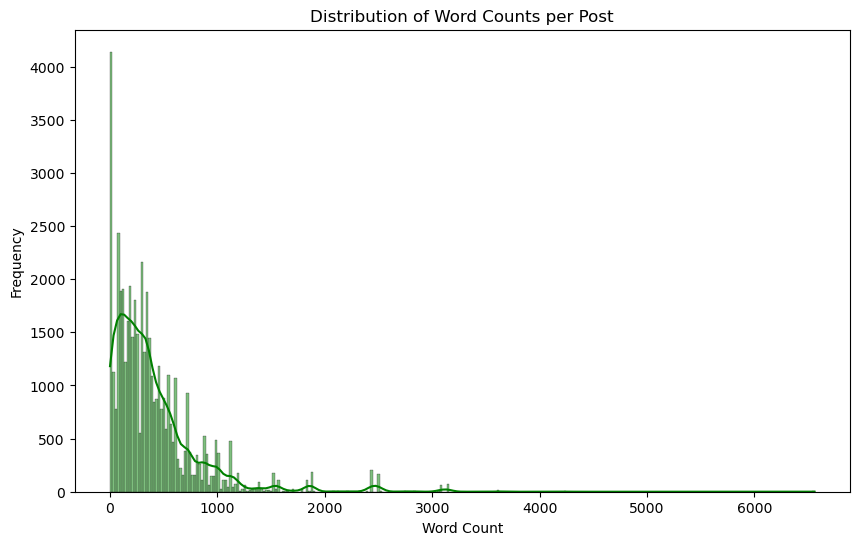

In [38]:
# Analyzing the distribution of word count per post can give additional insight into how detailed users are in their posts.import matplotlib.pyplot as plt
import seaborn as sns

# Calculate word counts
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Plot word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True, color='green')
plt.title('Distribution of Word Counts per Post')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


2. Distribution of Alphabetic Characters

Counting only alphabetic characters (i.e., excluding spaces and punctuation) to get a sense of the text's length without white space or symbols.

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


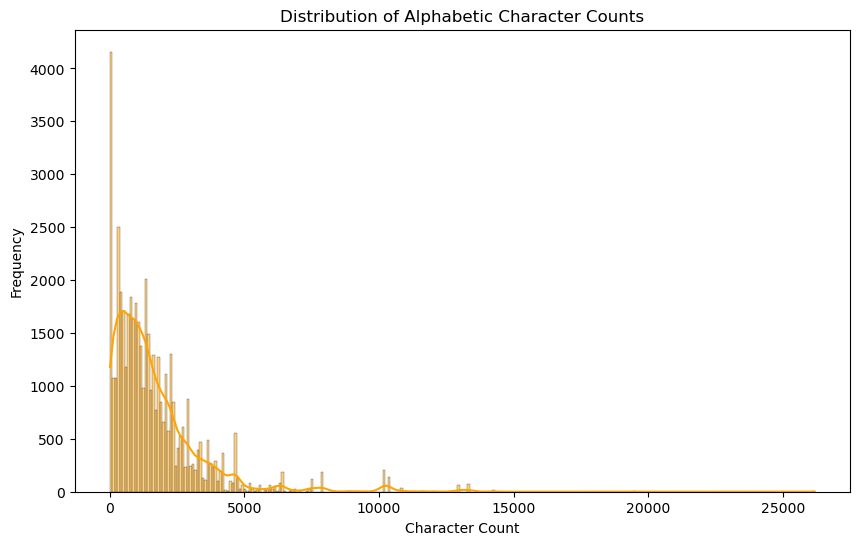

In [39]:
# Calculate alphabetic character count
df['char_count'] = df['cleaned_text'].apply(lambda x: len(re.sub(r'[^a-zA-Z]', '', x)))

# Plot character count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['char_count'], kde=True, color='orange')
plt.title('Distribution of Alphabetic Character Counts')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


3. Average Word Length


Average word length can provide insight into vocabulary complexity. Posts with higher average word lengths may contain more sophisticated language.

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


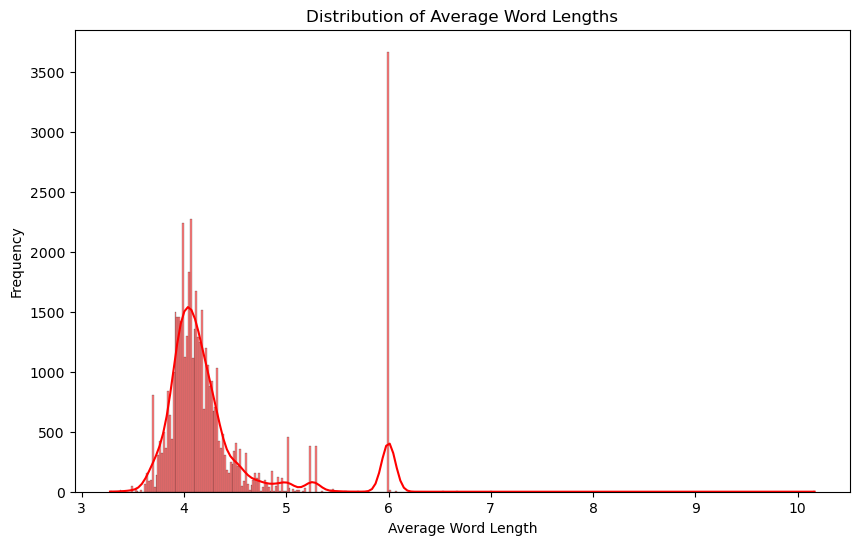

In [40]:
# Calculate average word length
df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

# Plot average word length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_word_length'], kde=True, color='red')
plt.title('Distribution of Average Word Lengths')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()


4. Most Common Bigrams and Trigrams



Instead of single words, i am extract common phrases using bigrams and trigrams to capture popular expressions or terms.

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


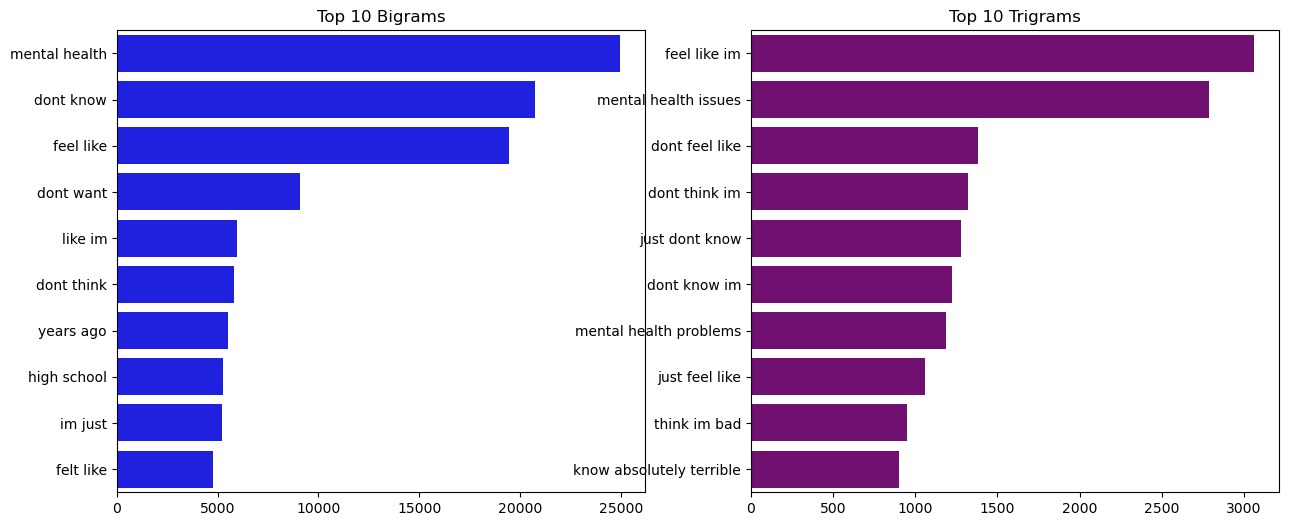

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top bigrams
top_bigrams = get_top_ngrams(df['cleaned_text'], ngram_range=(2, 2), n=10)

# Get top trigrams
top_trigrams = get_top_ngrams(df['cleaned_text'], ngram_range=(3, 3), n=10)

# Plot top bigrams and trigrams
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=[freq for word, freq in top_bigrams], y=[word for word, freq in top_bigrams], ax=axes[0], color="blue")
axes[0].set_title('Top 10 Bigrams')
sns.barplot(x=[freq for word, freq in top_trigrams], y=[word for word, freq in top_trigrams], ax=axes[1], color="purple")
axes[1].set_title('Top 10 Trigrams')
plt.show()


# Step 3: Topic Modeling (LDA)

Step 1: Text Preprocessing and Feature Engineering
 We will implement:

- Tokenization
- Lemmatization
- N-grams to capture phrases or multi-word expressions
- TF-IDF Vectorization for feature extraction

Enhanced Text Preprocessing

In [60]:
# Print the column names to identify the correct column
print(df.columns)


Index(['title', 'post_body', 'comment_body', 'comment_score', 'post_url',
       'created', 'subreddit', 'post_score', 'post_num_comments', 'author',
       'comment_author', 'post_created', 'post_flair', 'upvote_ratio',
       'over_18', 'is_self_post', 'author_premium', 'distinguished',
       'all_awardings', 'num_crossposts', 'total_awards_received',
       'post_thumbnail', 'link_flair_text', 'post_id', 'comment_id',
       'author_flair_text', 'cleaned_text', 'word_count', 'char_count',
       'avg_word_length'],
      dtype='object')


1. Preprocessing and Text Cleaning

In [61]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Remove non-alphabetic characters (punctuation, numbers, etc.)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Return cleaned text as a string
    return ' '.join(tokens)

# Apply text cleaning to the relevant columns
df['cleaned_post_body'] = df['post_body'].apply(clean_text)
df['cleaned_comment_body'] = df['comment_body'].apply(clean_text)

# Combine both cleaned post and comment bodies (optional)
df['combined_cleaned_text'] = df['cleaned_post_body'] + ' ' + df['cleaned_comment_body']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Emotion and Sentiment Detection

For sentiment analysis and emotion detection, I’ll use a pre-trained model from HuggingFace for detecting emotions (like hopelessness, guilt, etc.), going beyond simple positive/negative sentiment. For this, you can use models like distilbert-base-uncased or bert-base-uncased fine-tuned for sentiment analysis.

In [64]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline('sentiment-analysis', model='distilbert-base-uncased')

# Load a pre-trained emotion detection model
emotion_analyzer = pipeline('text-classification', model="j-hartmann/emotion-english-distilroberta-base")

# Function to get sentiment
def get_sentiment(text):
    if not text or pd.isna(text):  # Handle empty or NaN values
        return 'Neutral'  # or another default label
    sentiment = sentiment_analyzer(text)
    return sentiment[0]['label'] if sentiment else 'Neutral'

# Function to get emotion
def get_emotion(text):
    if not text or pd.isna(text):  # Handle empty or NaN values
        return 'No Emotion'  # or another default label
    emotion = emotion_analyzer(text)
    return emotion[0]['label'] if emotion else 'No Emotion'

# Apply sentiment and emotion analysis
df['post_sentiment'] = df['cleaned_post_body'].apply(get_sentiment)
df['comment_sentiment'] = df['cleaned_comment_body'].apply(get_sentiment)
df['post_emotion'] = df['cleaned_post_body'].apply(get_emotion)
df['comment_emotion'] = df['cleaned_comment_body'].apply(get_emotion)

# Display results
print(df[['post_sentiment', 'comment_sentiment', 'post_emotion', 'comment_emotion']].head())


ModuleNotFoundError: No module named 'transformers'